# Diabetes Prediction

In [1]:
# Import Neccessary libraries
import numpy as np
import pandas as pd

# Import Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Import for Model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report,f1_score, roc_curve, roc_auc_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#Import Sampler libraries
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.simplefilter(action='ignore')
plt.style.use("ggplot")
%matplotlib inline

## Exploratory Data Analysis

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/atalamahardika/Diabetes-Dataset/refs/heads/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(f'Baris dan kolom : {df.shape}')

Baris dan kolom : (768, 9)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
print(f'Data duplikasi : {df.duplicated().sum()}')

Data duplikasi : 0


In [7]:
df.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [8]:
print("Persentase")
(df['Outcome'].value_counts()*100/len(df)).round(2)

Persentase


Outcome
0    65.1
1    34.9
Name: count, dtype: float64

In [9]:
df.corr().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


1. Korelasi dengan variabel target (Outcome):
- Glucose: Memiliki korelasi tertinggi dengan Outcome (0.47), menunjukkan bahwa kadar glukosa merupakan prediktor yang kuat untuk diabetes.
- BMI: Juga memiliki korelasi yang cukup tinggi dengan Outcome (0.29), menunjukkan bahwa Indeks Massa Tubuh juga merupakan faktor penting.
- Age: Berkorelasi sebesar 0.24 dengan Outcome, mengindikasikan bahwa usia juga berperan dalam memprediksi diabetes.
2. Korelasi antar fitur:
- Insulin dan Glucose: Memiliki korelasi yang cukup tinggi (0.33), yang cukup logis karena keduanya berhubungan erat dalam metabolisme tubuh.
- SkinThickness dan BMI: Juga berkorelasi cukup tinggi (0.39), menunjukkan hubungan antara ketebalan kulit dan Indeks Massa Tubuh.


Berdasarkan analisis di atas, berikut beberapa fitur yang potensial untuk feature engineering:

- Glucose: Karena memiliki korelasi tertinggi dengan Outcome, kita dapat mencoba berbagai transformasi pada fitur ini, seperti membuat fitur polinomial (misalnya, Glucose^2) atau menggabungkannya dengan fitur lain (misalnya, rasio Glucose/Insulin).
- BMI: Dapat dikombinasikan dengan Age atau SkinThickness untuk membuat fitur baru yang lebih prediktif. Misalnya, kita dapat membuat fitur "BMI terhadap usia" atau "rasio BMI terhadap ketebalan kulit".
- Insulin: Karena berkorelasi tinggi dengan Glucose, kita dapat membuat fitur gabungan yang memperhitungkan kedua variabel tersebut. Misalnya, kita dapat membuat fitur "selisih Glucose dan Insulin" atau "rasio Glucose/Insulin".
- Age: Dapat dikelompokkan ke dalam kategori usia (misalnya, muda, dewasa, lansia) untuk melihat pola yang berbeda pada setiap kelompok usia.

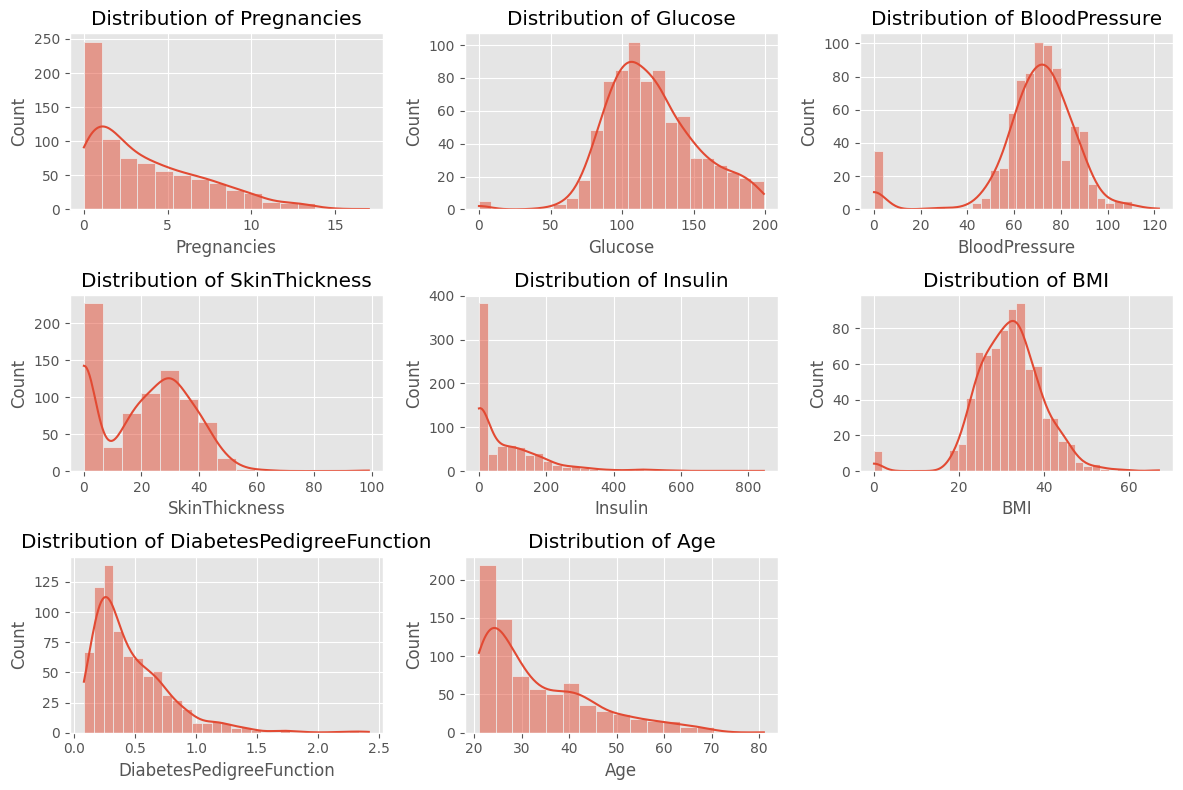

In [10]:
# Plot distribution of each feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):  # Ignoring 'Outcome' column
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

1. Distribution of Pregnancies:
- Bersifat right-skewed (miring kanan), artinya mayoritas data memiliki jumlah kehamilan yang sedikit, dan semakin banyak jumlah kehamilan, frekuensinya semakin menurun.
- Kemungkinan terdapat outlier pada data dengan jumlah kehamilan yang sangat tinggi (di atas 10).

2. Distribution of Glucose:
- Menyerupai distribusi normal, dengan sedikit kecenderungan terpusat di sekitar nilai 100-125.
- Terdapat beberapa data dengan kadar glukosa yang sangat tinggi (di atas 180) yang bisa jadi merupakan outlier.

3. Distribution of BloodPressure:
- Menyerupai distribusi normal, dengan puncak di sekitar nilai 70-80.
- Terdapat beberapa data dengan tekanan darah yang sangat rendah (di bawah 40) atau sangat tinggi (di atas 100) yang perlu diperhatikan.

4. Distribution of SkinThickness:
- Sebagian besar data terpusat di sekitar nilai 20-40.
- Terdapat data dengan ketebalan kulit yang sangat tipis (mendekati 0) dan sangat tebal (di atas 60) yang bisa jadi merupakan outlier atau kesalahan pengukuran.

5. Distribution of Insulin:
- Bersifat right-skewed (miring kanan) dengan mayoritas data memiliki kadar insulin yang rendah.
- Terdapat beberapa data dengan kadar insulin yang sangat tinggi (di atas 600) yang kemungkinan merupakan outlier.

6. Distribution of BMI:
- Menyerupai distribusi normal, dengan puncak di sekitar nilai 30.
- Terdapat beberapa data dengan BMI yang sangat rendah (di bawah 20) atau sangat tinggi (di atas 50) yang perlu diperhatikan.

7. Distribution of DiabetesPedigreeFunction:
- Bersifat right-skewed (miring kanan), dengan mayoritas data memiliki nilai yang rendah.
- Terdapat beberapa data dengan nilai yang sangat tinggi (di atas 1.5) yang bisa jadi merupakan outlier.

8. Distribution of Age:
- Data terdistribusi secara merata di berbagai kelompok usia, dengan sedikit kecenderungan peningkatan frekuensi pada usia 20-30 tahun.
- Terdapat beberapa data dengan usia yang sangat muda (di bawah 20 tahun) yang perlu diperhatikan.

In [11]:
# Calculate quartiles and IQR for each column
quartile_data = {}
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    quartile_data[col] = {'q1': q1, 'q3': q3, 'iqr': iqr,
                          'lower_bound': lower_bound, 'upper_bound': upper_bound}

# Convert the dictionary to DataFrame for better readability
quartile_df = pd.DataFrame(quartile_data).transpose()

# Find outliers in each column
outliers = {}
for col in df.columns:
    outliers[col] = []
    for value in df[col]:
        if value < quartile_data[col]['lower_bound'] or value > quartile_data[col]['upper_bound']:
            outliers[col].append(value)

# Combine total outliers and outlier data for each column
for col in df.columns:
    count = len(outliers[col])
    if count > 0:
        print(f"Total outliers in {col}: {count} --> {outliers[col]}")
    else:
        print(f"Total outliers in {col}: {count}")

Total outliers in Pregnancies: 4 --> [15, 17, 14, 14]
Total outliers in Glucose: 5 --> [0, 0, 0, 0, 0]
Total outliers in BloodPressure: 45 --> [0, 0, 30, 110, 0, 0, 0, 0, 108, 122, 30, 0, 110, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 24, 0, 0, 0, 0, 114, 0, 0, 0]
Total outliers in SkinThickness: 1 --> [99]
Total outliers in Insulin: 34 --> [543, 846, 342, 495, 325, 485, 495, 478, 744, 370, 680, 402, 375, 545, 360, 325, 465, 325, 415, 579, 474, 328, 480, 326, 330, 600, 321, 440, 540, 480, 335, 387, 392, 510]
Total outliers in BMI: 19 --> [0.0, 0.0, 0.0, 0.0, 53.2, 55.0, 0.0, 67.1, 52.3, 52.3, 52.9, 0.0, 0.0, 59.4, 0.0, 0.0, 57.3, 0.0, 0.0]
Total outliers in DiabetesPedigreeFunction: 29 --> [2.288, 1.441, 1.39, 1.893, 1.781, 1.222, 1.4, 1.321, 1.224, 2.329, 1.318, 1.213, 1.353, 1.224, 1.391, 1.476, 2.137, 1.731, 1.268, 1.6, 2.42, 1.251, 1.699, 1.258, 1.282, 1.698, 1.461, 1.292, 1.394]
Total outliers in Age: 9 --> [69, 67, 72, 81, 67, 67, 70, 68, 69]
Total 

In [12]:
# Remove rows with outliers
original_size = df.shape
for col in df.columns:
    df = df[(df[col] >= quartile_data[col]['lower_bound']) & (df[col] <= quartile_data[col]['upper_bound'])]

# Print size before and after removing outliers
print(f"Data size before removing outliers: {original_size}")
print(f"Data size after removing outliers: {df.shape}")

Data size before removing outliers: (768, 9)
Data size after removing outliers: (639, 9)


## Preprocessing

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               639 non-null    int64  
 1   Glucose                   639 non-null    int64  
 2   BloodPressure             639 non-null    int64  
 3   SkinThickness             639 non-null    int64  
 4   Insulin                   639 non-null    int64  
 5   BMI                       639 non-null    float64
 6   DiabetesPedigreeFunction  639 non-null    float64
 7   Age                       639 non-null    int64  
 8   Outcome                   639 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 49.9 KB


In [14]:
x = df.drop(columns='Outcome')
y = df['Outcome']

In [15]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [16]:
# for imbalance data
ros = RandomOverSampler(random_state=40)
x_ros, y_ros = ros.fit_resample(x, y)

# SMOTE + ENN
smote_enn = SMOTEENN(random_state=42)
X_resampled_enn, y_resampled_enn = smote_enn.fit_resample(x_ros, y_ros)

In [18]:
num_cols = X_resampled_enn.select_dtypes(exclude='object').columns
num_cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [19]:
num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer()),
        ("scaler", StandardScaler())
    ]
)

In [20]:
preprocessor = ColumnTransformer(
    [
        ("num_pipeline", num_pipeline, num_cols)
    ]
)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_enn, y_resampled_enn, test_size=0.2, random_state=42)

In [22]:
preprocessor.fit_transform(X_train)

array([[ 0.56666417,  0.59477289,  0.6163235 , ..., -0.46963327,
        -1.13428202,  1.52561854],
       [ 0.85813188,  0.09744109, -0.43187168, ...,  0.86446629,
        -0.06417723,  0.87791004],
       [-0.8906744 , -1.14588841, -0.78127007, ...,  0.62729304,
         0.06702336, -0.51003676],
       ...,
       [-0.30773897,  0.37373653, -1.65476606, ..., -1.04774308,
        -0.21587791, -1.06521548],
       [-1.18214211,  2.00387965, -0.60657088, ...,  1.27951949,
         0.19412393, -0.51003676],
       [-0.30773897, -0.73144525, -0.95596927, ..., -1.61102956,
        -0.72018016, -0.69509633]])

In [23]:
preprocessor.transform(X_test)

array([[-0.30773897,  1.0368456 , -0.25717248, -0.18030911,  0.34818891,
        -0.15834337, -0.76528037, -0.51003676],
       [-1.18214211,  0.15270018,  1.31512029, -1.36890675, -0.88909155,
        -0.15834337,  1.18222835, -0.13991761],
       [-0.30773897,  1.86573193, -0.25717248,  0.67812252, -0.88909155,
         0.33082647, -0.87598086, -0.78762612],
       [ 0.85813188, -0.86959297, -0.78127007,  0.28192331,  0.0418147 ,
         0.09365321,  1.16172826,  0.69285046],
       [-1.18214211, -0.59329752, -0.78127007,  1.07432174, -0.13493965,
         0.1381232 ,  0.22692407, -1.06521548],
       [-0.01627126, -0.23411345, -0.78127007,  0.41398971,  0.52494326,
         0.07882988, -0.92108106, -0.88015591],
       [-0.8906744 , -0.9524816 , -1.65476606,  0.28192331,  0.28927079,
        -1.10703639, -0.90468099, -0.97268569],
       [-1.18214211, -0.56566798,  0.9657219 , -1.36890675, -0.88909155,
        -0.70680652,  1.17402831,  2.63597598],
       [ 1.73253502, -0.39989071

In [24]:
preprocessor.get_feature_names_out()

array(['num_pipeline__Pregnancies', 'num_pipeline__Glucose',
       'num_pipeline__BloodPressure', 'num_pipeline__SkinThickness',
       'num_pipeline__Insulin', 'num_pipeline__BMI',
       'num_pipeline__DiabetesPedigreeFunction', 'num_pipeline__Age'],
      dtype=object)

In [25]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [28]:
acc_t=[] # Storing accuracy score for Training set
acc=[] # Storing accuracy score for testing set
p_t=[] # Storing precison score for Training set
p=[] # Storing precison score for Testing set
r_t=[] # Storing recall score for Training set
r=[] # Storing recall score for Testing set
f1_t=[] # Storing f1 score for Training set
f1=[] # Storing f1 score for Testing set

## Create Model

### Random Forest Model

Kode dibawah ini digunakan untuk mencari hyperparameter optimal

In [37]:
model = RandomForestClassifier()
# Definisikan grid hyperparameter yang lebih lengkap
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

# Lakukan Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Tampilkan hyperparameter terbaik
print(grid_search.best_params_)
print(grid_search.best_score_)

{'bootstrap': False, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
0.9636791066705847


Random Forest Accuracy: 0.970873786407767
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        52
           1       0.94      1.00      0.97        51

    accuracy                           0.97       103
   macro avg       0.97      0.97      0.97       103
weighted avg       0.97      0.97      0.97       103



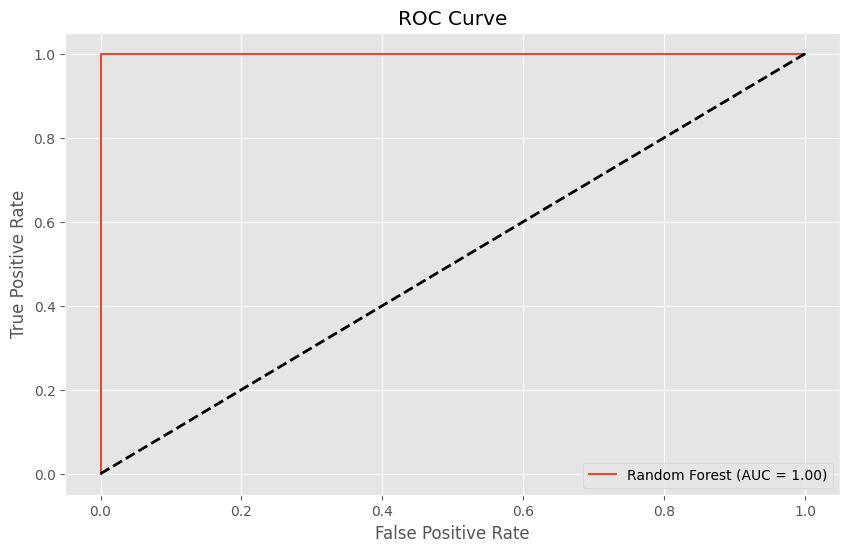

In [26]:
# General function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")
    print(classification_report(y_true, y_pred))
    return accuracy

# Function to plot ROC curve
def plot_roc_curve(y_true, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    return auc

# Create figure for ROC curves
plt.figure(figsize=(10, 6))

### Model: Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features='sqrt',criterion='gini', class_weight='balanced_subsample', bootstrap=False)
rf_model.fit(X_train, y_train)  # Random Forest does not require scaling
y_pred_rf_test = rf_model.predict(X_test)
y_pred_rf_train = rf_model.predict(X_train)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf_test, "Random Forest")
plot_roc_curve(y_test, y_proba_rf, "Random Forest")

# Display ROC curve
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Baseline
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [29]:
acc_t.append(accuracy_score(y_train,y_pred_rf_train))
acc.append(accuracy_score(y_test,y_pred_rf_test))
p_t.append(precision_score(y_train,y_pred_rf_train))
p.append(precision_score(y_test,y_pred_rf_test))
r_t.append(recall_score(y_train,y_pred_rf_train))
r.append(recall_score(y_test,y_pred_rf_test))
f1_t.append(f1_score(y_train,y_pred_rf_train))
f1.append(f1_score(y_test,y_pred_rf_test))

Training Metrics

In [34]:
train_metrics = pd.DataFrame({'Training Accuracy':acc_t, 'Training Precision':p_t, 'Training Recall':r_t, 'Training F1 Score':f1_t})
train_metrics

,Training Accuracy,Training Precision,Training Recall,Training F1 Score
0,1.0,1.0,1.0,1.0


[[180   0]
 [  0 232]]


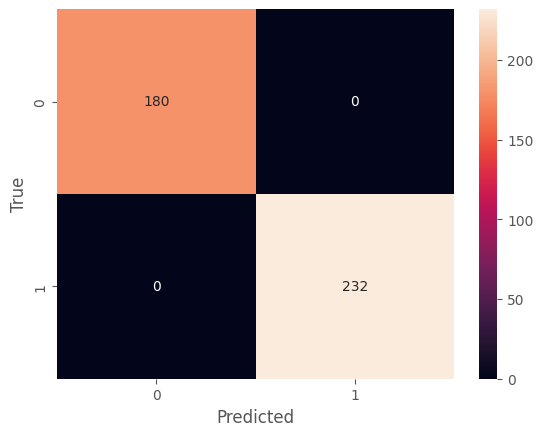

In [32]:
cm = confusion_matrix(y_train, y_pred_rf_train)
print(cm)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Testing Metrics

In [35]:
test_metrics = pd.DataFrame({'Testing Accuracy':acc, 'Testing Precision':p, 'Testing Recall':r, 'Testing F1 Score':f1})
test_metrics

,Testing Accuracy,Testing Precision,Testing Recall,Testing F1 Score
0,0.970874,0.944444,1.0,0.971429


[[49  3]
 [ 0 51]]


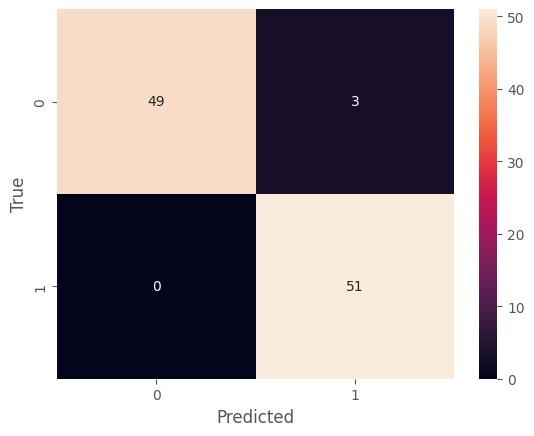

In [36]:
cm = confusion_matrix(y_test, y_pred_rf_test)
print(cm)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()